In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/dataframe_data/tables/table_principale.csv")
df_valeurs_angle = pd.read_csv("../data/dataframe_data/tables/table_valeurs_angle.csv")
df_valeurs_throttle =  pd.read_csv("../data/dataframe_data/tables/table_valeurs_throttle.csv")

In [3]:
df.head()

,timestamp_ms,cam/image_array,user/angle,user/mode,user/throttle,circuit,date
0,1616688906607,0_cam_image_array_.jpg,0.0,user,0.0,waveshare,Thu Mar 25 17:15:06 2021
1,1616688906670,1_cam_image_array_.jpg,0.0,user,0.0,waveshare,Thu Mar 25 17:15:06 2021
2,1616688906738,2_cam_image_array_.jpg,0.0,user,0.3,waveshare,Thu Mar 25 17:15:06 2021
3,1616688906797,3_cam_image_array_.jpg,0.0,user,0.3,waveshare,Thu Mar 25 17:15:06 2021
4,1616688906861,4_cam_image_array_.jpg,0.0,user,0.3,waveshare,Thu Mar 25 17:15:06 2021


In [4]:
df_valeurs_angle

,angle
0,-1.0
1,-0.9
2,-0.8
3,-0.7
4,-0.6
5,-0.5
6,-0.4
7,-0.3
8,-0.2
9,-0.1


In [5]:
print(np.shape(df))

(5631, 7)


In [6]:
#Pas de valeurs manquantes observées 
df.isnull().sum()

timestamp_ms       0
cam/image_array    0
user/angle         0
user/mode          0
user/throttle      0
circuit            0
date               0
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.dtypes

timestamp_ms                int64
cam/image_array            object
user/angle                float64
user/mode                  object
user/throttle             float64
circuit                    object
date               datetime64[ns]
dtype: object

In [9]:
#On affiche le nombre de modalités différentes par variable
for col in df.columns:
    print(col, len(df[col].unique()))

timestamp_ms 5631
cam/image_array 1808
user/angle 20
user/mode 1
user/throttle 11
circuit 4
date 361


## 1. Etude unidimensionnelle
### 1.1 Analyse des variables numériques

In [10]:
#On observe une distribution de l'angle allant de -1 à 1, avec une moyenne de -0.16 pour une médiane de 0. 
df["user/angle"].describe()

count    5631.000000
mean       -0.028148
std         0.417586
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: user/angle, dtype: float64

In [11]:
#On observe une distribution du throttle allant de 0 à 1, avec une moyenne de 0.45 pour une médiane de 0.4. 
df["user/throttle"].describe()

count    5631.000000
mean        0.492026
std         0.208850
min         0.000000
25%         0.400000
50%         0.500000
75%         0.600000
max         1.000000
Name: user/throttle, dtype: float64

In [12]:
bins = [-1, -0.5, -0.1, 0.1, 0.5, 1]
df['categorie_angle'] = pd.cut(df['user/angle'], bins)
df.head()

,timestamp_ms,cam/image_array,user/angle,user/mode,user/throttle,circuit,date,categorie_angle
0,1616688906607,0_cam_image_array_.jpg,0.0,user,0.0,waveshare,2021-03-25 17:15:06,"(-0.1, 0.1]"
1,1616688906670,1_cam_image_array_.jpg,0.0,user,0.0,waveshare,2021-03-25 17:15:06,"(-0.1, 0.1]"
2,1616688906738,2_cam_image_array_.jpg,0.0,user,0.3,waveshare,2021-03-25 17:15:06,"(-0.1, 0.1]"
3,1616688906797,3_cam_image_array_.jpg,0.0,user,0.3,waveshare,2021-03-25 17:15:06,"(-0.1, 0.1]"
4,1616688906861,4_cam_image_array_.jpg,0.0,user,0.3,waveshare,2021-03-25 17:15:06,"(-0.1, 0.1]"


In [13]:
bins = [-0.1, 0.25, 0.5, 0.75 ,1]
df['categorie_throttle'] = pd.cut(df['user/throttle'], bins)
df.head()

,timestamp_ms,cam/image_array,user/angle,user/mode,user/throttle,circuit,date,categorie_angle,categorie_throttle
0,1616688906607,0_cam_image_array_.jpg,0.0,user,0.0,waveshare,2021-03-25 17:15:06,"(-0.1, 0.1]","(-0.1, 0.25]"
1,1616688906670,1_cam_image_array_.jpg,0.0,user,0.0,waveshare,2021-03-25 17:15:06,"(-0.1, 0.1]","(-0.1, 0.25]"
2,1616688906738,2_cam_image_array_.jpg,0.0,user,0.3,waveshare,2021-03-25 17:15:06,"(-0.1, 0.1]","(0.25, 0.5]"
3,1616688906797,3_cam_image_array_.jpg,0.0,user,0.3,waveshare,2021-03-25 17:15:06,"(-0.1, 0.1]","(0.25, 0.5]"
4,1616688906861,4_cam_image_array_.jpg,0.0,user,0.3,waveshare,2021-03-25 17:15:06,"(-0.1, 0.1]","(0.25, 0.5]"


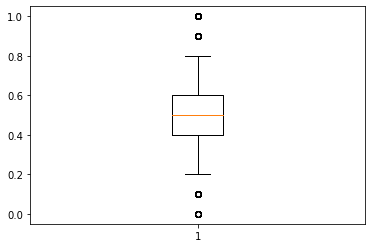

In [14]:
#On peut aussi avoir la répartition du throttle sur un boxplot mais je trouve ça moins visuel.
plt.boxplot(df["user/throttle"])
plt.show()

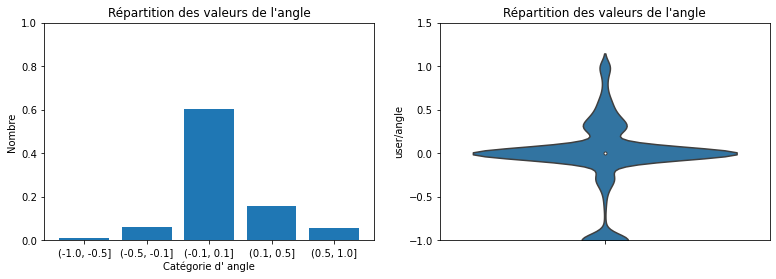

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,4))

ax1.bar([str(i) for i in df["categorie_angle"].value_counts().sort_index().index], df["categorie_angle"].value_counts().sort_index().apply(lambda x: x/len(df)))

ax1.set_xlabel("Catégorie d' angle")
ax1.set_ylabel("Nombre")
ax1.set_title("Répartition des valeurs de l'angle")
ax1.set_ylim(0,1)

sns.violinplot(y = "user/angle", data = df)
ax2.set_title("Répartition des valeurs de l'angle")
ax2.set_ylim(-1,1.5)
plt.show()

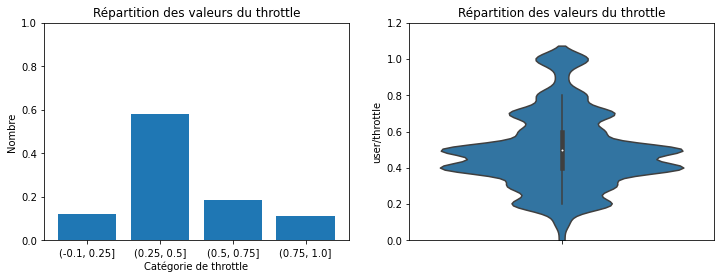

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.bar([str(i) for i in df["categorie_throttle"].value_counts().sort_index().index], df["categorie_throttle"].value_counts().sort_index().apply(lambda x: x/len(df)))
ax1.set_xlabel("Catégorie de throttle")
ax1.set_ylabel("Nombre")
ax1.set_title("Répartition des valeurs du throttle")
ax1.set_ylim(0,1)

sns.violinplot(y = "user/throttle", data = df)
ax2.set_title("Répartition des valeurs du throttle")
ax2.set_ylim(-0,1.2)
plt.show()

### 1.2 Analyse des variables catégorielles
#### Répartition des circuits

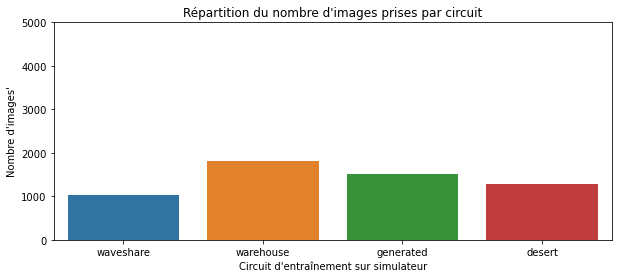

In [17]:
#Alternative via Seaborn
fig, ax1 = plt.subplots(1,1,figsize=(10,4))

ax1 = sns.countplot(x = "circuit", data = df)

ax1.set_xlabel("Circuit d'entraînement sur simulateur")
ax1.set_ylabel("Nombre d'images'")
ax1.set_title("Répartition du nombre d'images prises par circuit")
ax1.set_ylim(0,5000)
plt.show()

## 2. Analyses bidimensionnelles 
#### 2.1.2 Scatterplot entre variables numériques

In [18]:
df.columns

Index(['timestamp_ms', 'cam/image_array', 'user/angle', 'user/mode',
       'user/throttle', 'circuit', 'date', 'categorie_angle',
       'categorie_throttle'],
      dtype='object')

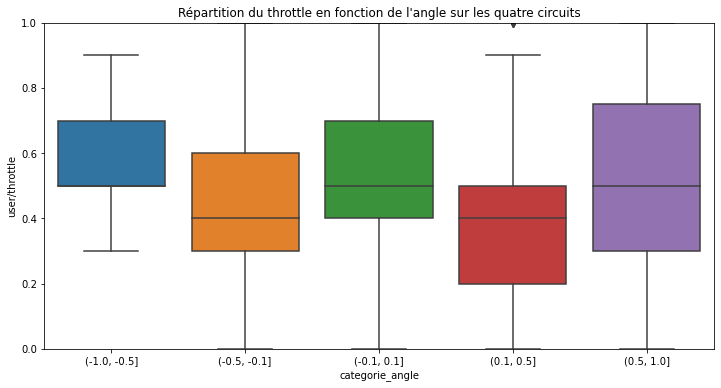

In [19]:
# à revoir problème au ni
fig, ax = plt.subplots(1,1, figsize = (12, 6))

sns.boxplot(x='categorie_angle', y = "user/throttle", data=df, ax = ax)
ax.set_ylim(0,1)
ax.set_title("Répartition du throttle en fonction de l'angle sur les quatre circuits")

plt.show()

#### 2.1.3 Autre relations entre variables explicatives

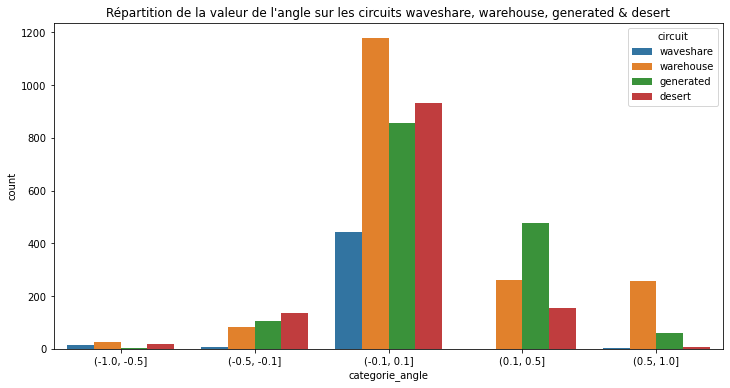

In [20]:
fig, ax = plt.subplots(1,1, figsize = (12, 6))
sns.countplot(x = 'categorie_angle', hue = 'circuit', data = df)
ax.set_title("Répartition de la valeur de l'angle sur les circuits waveshare, warehouse, generated & desert")
plt.show()

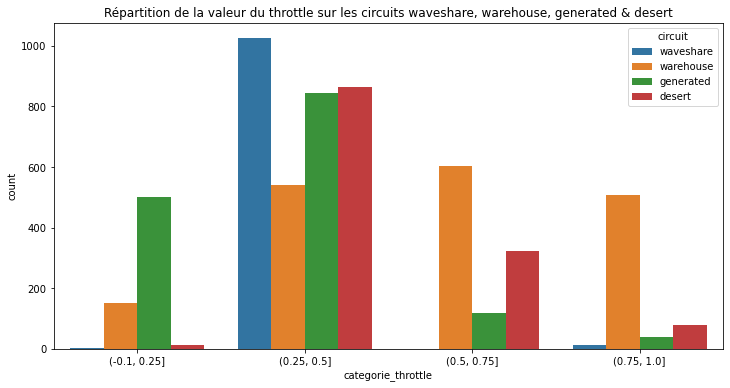

In [21]:
fig, ax = plt.subplots(1,1, figsize = (12, 6))
sns.countplot(x = 'categorie_throttle', hue = 'circuit', data = df)
ax.set_title("Répartition de la valeur du throttle sur les circuits waveshare, warehouse, generated & desert")
plt.show()